In [ ]:
!pip install tensorflow-gan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.1/367.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_gan as tfgan
from tensorflow import keras
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch_size = 120
latent_dim = 110

In [ ]:
### https://blog.tensorflow.org/2022/01/summer-of-code.html

@tf.function
def get_inception_score(images, num_inception_images = 8):
 size = tfgan.eval.INCEPTION_DEFAULT_IMAGE_SIZE
 resized_images = tf.image.resize(images, [size, size], method=tf.image.ResizeMethod.BILINEAR)

 num_batches = batch_size // num_inception_images
 inc_score = tfgan.eval.inception_score(resized_images, num_batches=num_batches)

 return inc_score

In [ ]:
@tf.function
def get_fid_score(real_image, gen_image):
 size = tfgan.eval.INCEPTION_DEFAULT_IMAGE_SIZE

 resized_real_images = tf.image.resize(real_image, [size, size], method=tf.image.ResizeMethod.BILINEAR)
 resized_generated_images = tf.image.resize(gen_image, [size, size], method=tf.image.ResizeMethod.BILINEAR)
 num_inception_images = 1
 num_batches = batch_size // num_inception_images
 fid = tfgan.eval.frechet_inception_distance(resized_real_images, resized_generated_images, num_batches=num_batches)
 return fid

# UNCONDITIONAL MODELS

In [ ]:
# We'll use all the available examples from both the training and test
# sets.
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size=1024).batch(batch_size)

all_images = np.concatenate([x_train, x_test])
all_labels = np.concatenate([y_train, y_test])

# Scale the pixel values to [0, 1] range, add a channel dimension to
# the images, and one-hot encode the labels.
all_images = all_images.astype("float32") / 255.0
all_labels = keras.utils.to_categorical(all_labels, 10)

dataset = tf.data.Dataset.from_tensor_slices((all_images))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

print(f"Shape of training images: {all_images.shape}")
print(f"Shape of training labels: {all_labels.shape}")

Shape of training images: (60000, 32, 32, 3)
Shape of training labels: (60000, 10)


In [ ]:
def getRealImages():
  for i in dataset:
    return i  

In [ ]:
realImages = getRealImages()

In [ ]:
del x_train
del y_train
del x_test
del y_test

del all_images
del all_labels
del dataset

NameError: ignored

In [ ]:
un_trans_conv_gan = tf.keras.saving.load_model(
    "/content/drive/MyDrive/un_trans_conv_gan"
)

un_trans_conv_vae = tf.keras.saving.load_model(
    "/content/drive/MyDrive/un_trans_conv_vae"
)

un_upsc_conv_gan = tf.keras.saving.load_model(
    "/content/drive/MyDrive/un_upsc_conv_gan"
)

un_upsc_conv_vae = tf.keras.saving.load_model(
    "/content/drive/MyDrive/un_upsc_conv_vae"
)

In [ ]:
z = tf.random.normal(shape=(batch_size, 110))

un_trans_conv_gan_generated_image = un_trans_conv_gan(z)
un_upsc_conv_gan_generated_image = un_upsc_conv_gan(z)
un_trans_conv_vae_generated_image = un_trans_conv_vae(z)
un_upsc_conv_vae_generated_image = un_upsc_conv_vae(z)

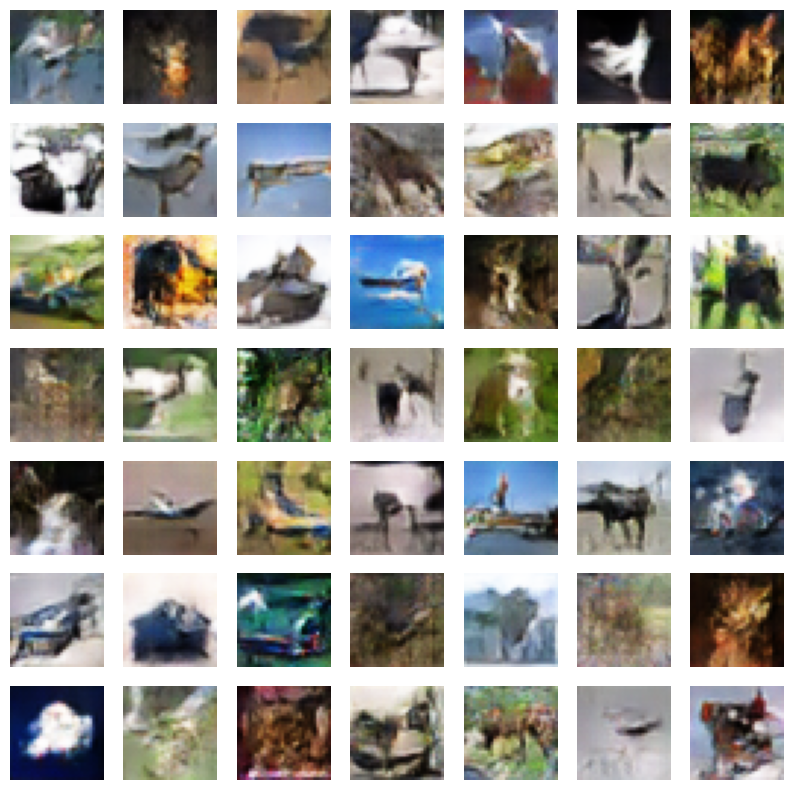

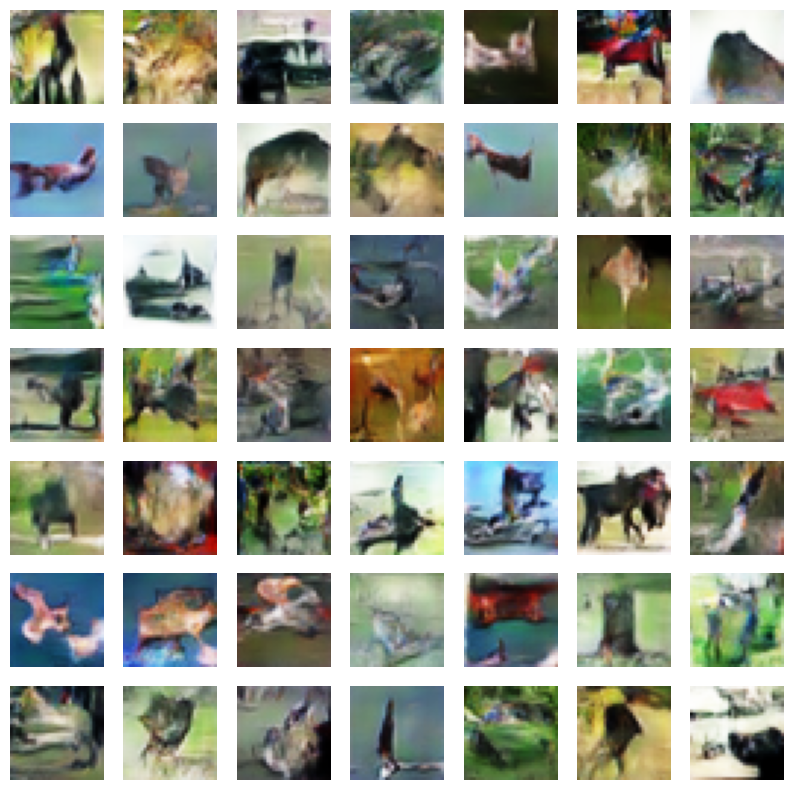

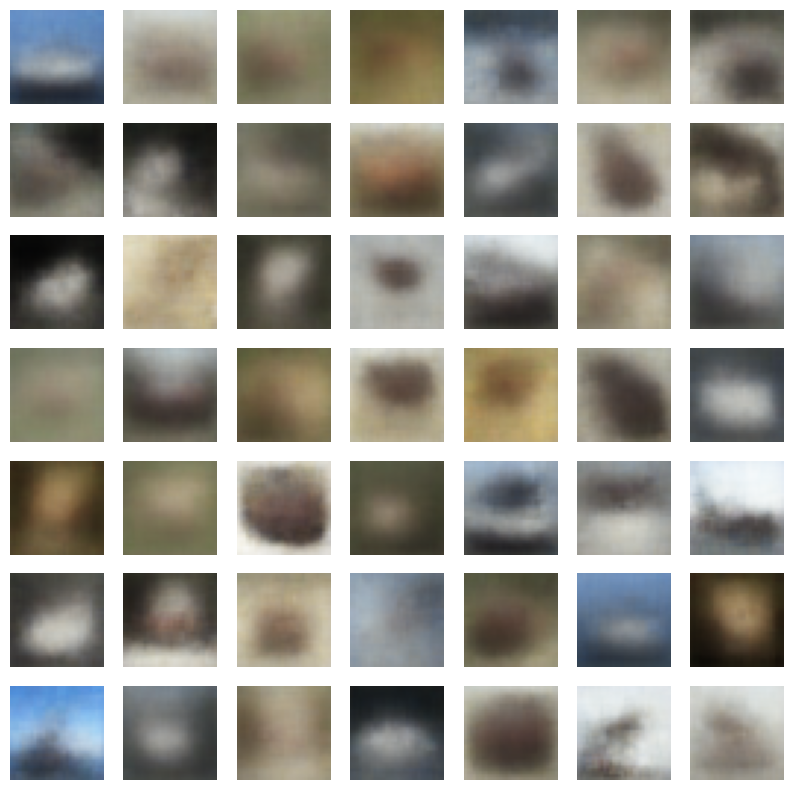

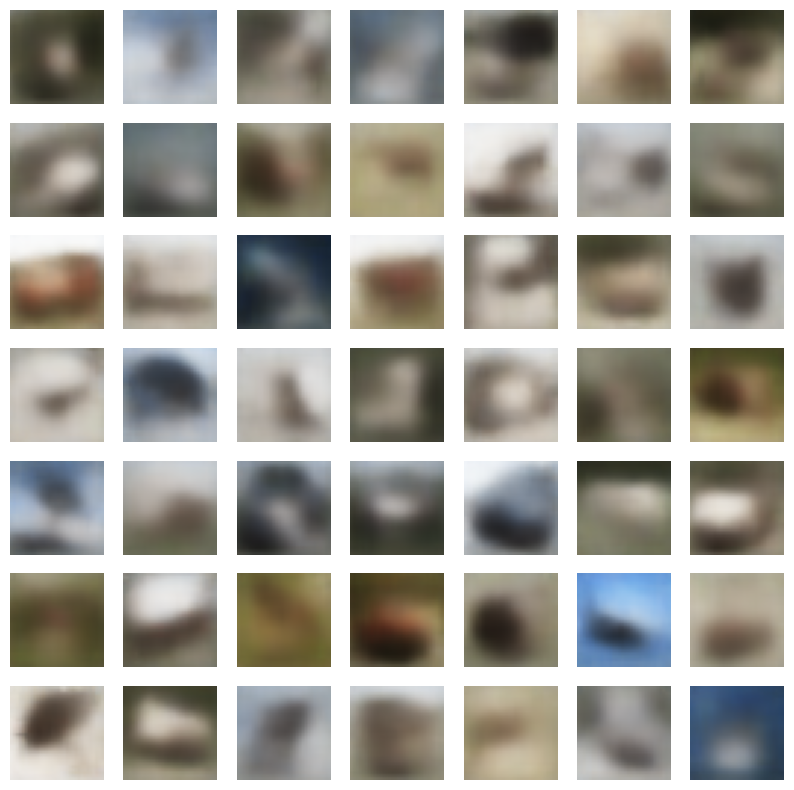

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images(images):
    fig, axs = plt.subplots(nrows=7, ncols=7, figsize=(10, 10))

    for i in range(7):
        for j in range(7):
            axs[i,j].imshow(images[i*7+j])
            axs[i,j].axis('off')

    plt.show()
plot_images(un_trans_conv_gan_generated_image)
plot_images(un_upsc_conv_gan_generated_image)
plot_images(un_trans_conv_vae_generated_image)
plot_images(un_upsc_conv_vae_generated_image)

In [ ]:
print("---------- INCEPTION SCORE ------------")
print("Uncondition Transposed Convolution Gan")
print(get_inception_score(un_trans_conv_gan_generated_image))
print()

print("Uncondition Upscale Convolution Gan")
print(get_inception_score(un_upsc_conv_gan_generated_image))
print()

print("Uncondition Transposed Convolution VAE")
print(get_inception_score(un_trans_conv_vae_generated_image))
print()

print("Uncondition Upscale Convolution VAE")
print(get_inception_score(un_upsc_conv_vae_generated_image))
print()


print("---------- FRECHET INCEPTION DISTANCE SCORE ------------")
print("Uncondition Transposed Convolution Gan")
print(get_fid_score(realImages, un_trans_conv_gan_generated_image))
print()

print("Uncondition Upscale Convolution Gan")
print(get_fid_score(realImages, un_upsc_conv_gan_generated_image))
print()

print("Uncondition Transposed Convolution VAE")
print(get_fid_score(realImages, un_trans_conv_vae_generated_image))
print()

print("Uncondition Upscale Convolution VAE")
print(get_fid_score(realImages, un_upsc_conv_vae_generated_image))
print()

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))


---------- INCEPTION SCORE ------------
Uncondition Transposed Convolution Gan


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/nest.py:917: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  structure[0], [func(*x) for x in entries],
/usr/local/lib/python3.9/dist-packages/keras/legacy_tf_layers/base.py:627: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  self.updates, tf.compat.v1.GraphKeys.UPDATE_OPS


tf.Tensor(4.224521, shape=(), dtype=float32)

Uncondition Upscale Convolution Gan
tf.Tensor(5.3463454, shape=(), dtype=float32)

Uncondition Transposed Convolution VAE
tf.Tensor(1.9790983, shape=(), dtype=float32)

Uncondition Upscale Convolution VAE
tf.Tensor(1.4193777, shape=(), dtype=float32)

---------- FRECHET INCEPTION DISTANCE SCORE ------------
Uncondition Transposed Convolution Gan
tf.Tensor(184.16078, shape=(), dtype=float32)

Uncondition Upscale Convolution Gan
tf.Tensor(186.089, shape=(), dtype=float32)

Uncondition Transposed Convolution VAE
tf.Tensor(324.03116, shape=(), dtype=float32)

Uncondition Upscale Convolution VAE
tf.Tensor(351.15283, shape=(), dtype=float32)



In [ ]:
del realImages
del un_trans_conv_gan
del un_trans_conv_vae
del un_upsc_conv_gan
del un_upsc_conv_vae

del un_trans_conv_gan_generated_image
del un_upsc_conv_gan_generated_image
del un_trans_conv_vae_generated_image
del un_upsc_conv_vae_generated_image

NameError: ignored

# CONDITIONAL MODELS

In [ ]:
# We'll use all the available examples from both the training and test
# sets.
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size=1024).batch(batch_size)

all_images = np.concatenate([x_train, x_test])
all_labels = np.concatenate([y_train, y_test])

# Scale the pixel values to [0, 1] range, add a channel dimension to
# the images, and one-hot encode the labels.
all_images = all_images.astype("float32") / 255.0
all_labels = keras.utils.to_categorical(all_labels, 10)

dataset = tf.data.Dataset.from_tensor_slices((all_images, all_labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

print(f"Shape of training images: {all_images.shape}")
print(f"Shape of training labels: {all_labels.shape}")

Shape of training images: (60000, 32, 32, 3)
Shape of training labels: (60000, 10)


In [ ]:
def getRealImages():
  for i in dataset:
    return i  

In [ ]:
realImages = getRealImages()[0]

In [ ]:
del x_train
del y_train
del x_test
del y_test

del all_images
del all_labels
del dataset

NameError: ignored

In [ ]:
trad_cond_vae = tf.keras.saving.load_model(
    "/content/drive/MyDrive/trad_cond_vae"
)

trans_cond_gan = tf.keras.saving.load_model(
    "/content/drive/MyDrive/trans-cond-gan"
)

upsc_cond_gan = tf.keras.saving.load_model(
    "/content/drive/MyDrive/upsc-cond-gan"
)

upsc_cond_vae = tf.keras.saving.load_model(
    "/content/drive/MyDrive/upsc-cond-vae"
)



In [ ]:
import random

def generateWithCGan(model, z):
  label = keras.utils.to_categorical([random.randint(0, 9) for i in range(batch_size)], 10)
  noise_and_labels = tf.concat([z, label], 1)
  generated_image = model.predict(noise_and_labels)
  return generated_image


def decode(model, z, apply_sigmoid=False):
    logits = model(z)
    if apply_sigmoid:
        probs = tf.sigmoid(logits)
        return probs
    return logits

def sample(model, eps=None):
    label = keras.utils.to_categorical([random.randint(0, 9) for i in range(batch_size)], 10)
    if eps is None:
        eps = tf.random.normal(shape=(batch_size, latent_dim))
    return decode(model, tf.concat([eps, label], 1), apply_sigmoid=True)

def generateWithCVae(model, eps):
  return sample(model, eps)

In [ ]:
z = tf.random.normal(shape=(batch_size, latent_dim))

In [ ]:
trad_cond_vae_generated_images = generateWithCVae(trad_cond_vae, z)
upsc_cond_vae_generated_images = generateWithCVae(upsc_cond_vae, z)

trans_cond_gan_generated_images = generateWithCGan(trans_cond_gan, z)
upsc_cond_gan_generated_images = generateWithCGan(upsc_cond_gan, z)

4/4 [==============================] - 0s 34ms/step


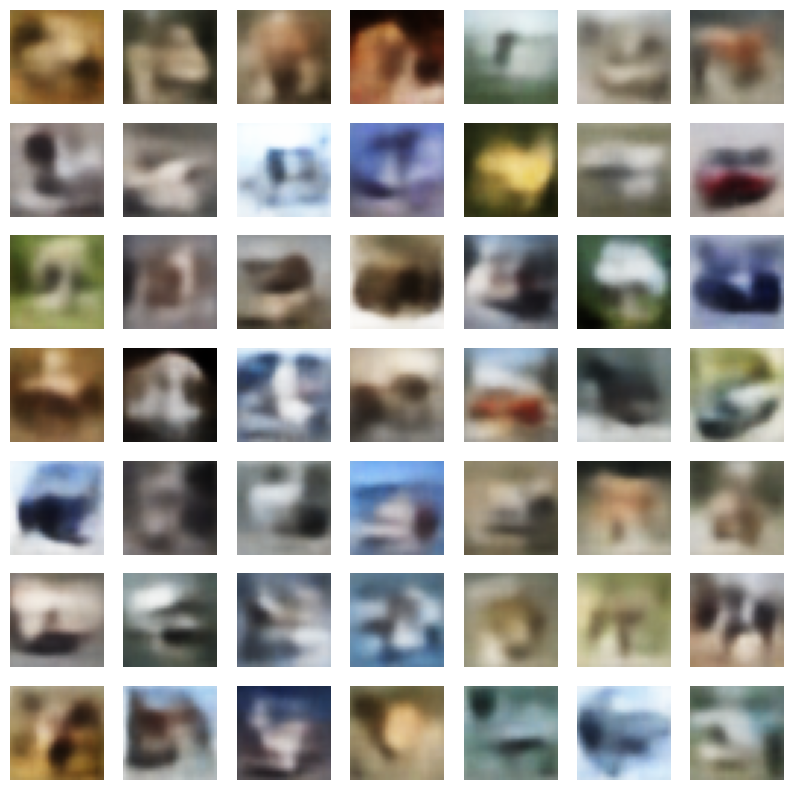

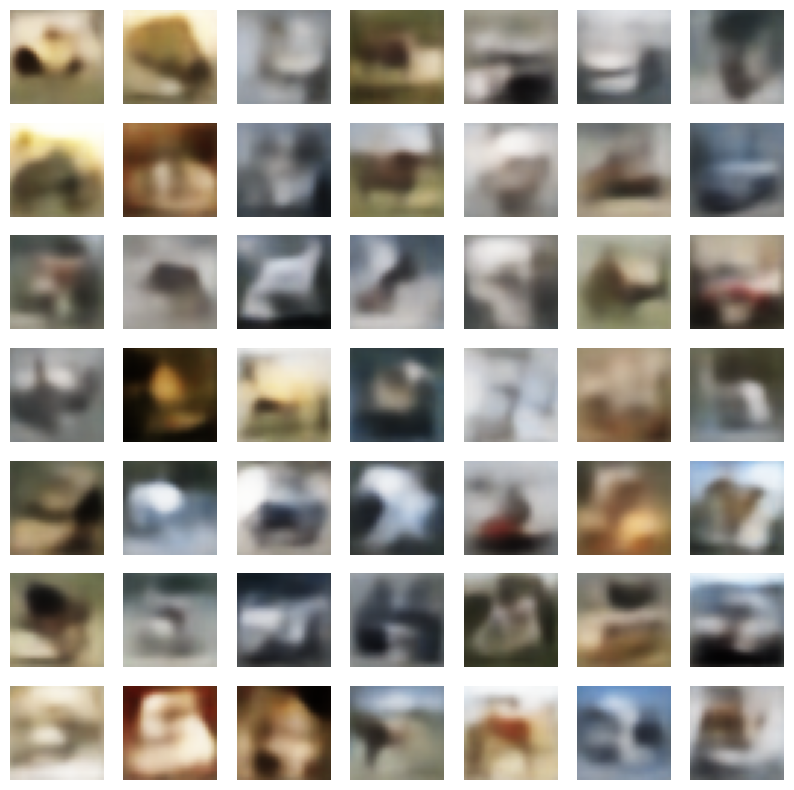

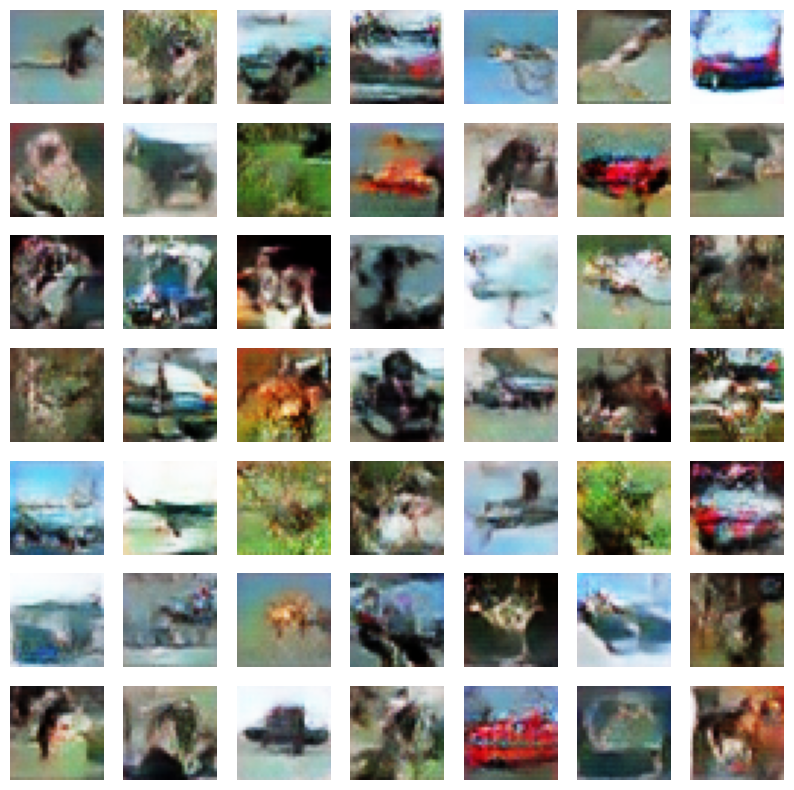

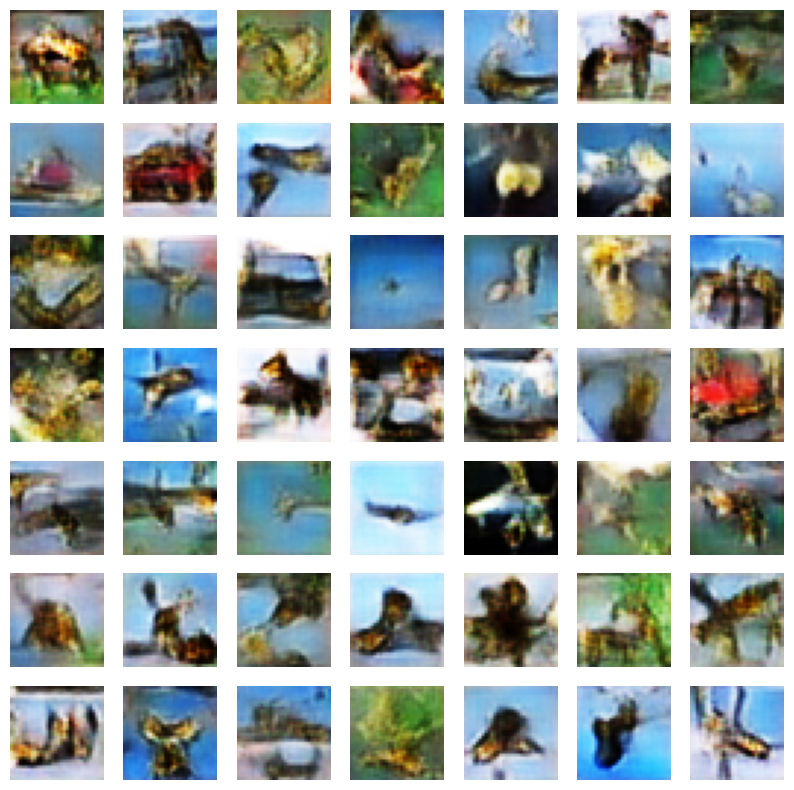

In [ ]:
plot_images(trad_cond_vae_generated_images)
plot_images(upsc_cond_vae_generated_images)
plot_images(trans_cond_gan_generated_images)
plot_images(upsc_cond_gan_generated_images)

In [ ]:
print("---------- INCEPTION SCORE ------------")
print("Conditional Transposed Convolution Gan")
print(get_inception_score(trans_cond_gan_generated_images))
print()

print("Conditional Upscale Convolution Gan")
print(get_inception_score(upsc_cond_gan_generated_images))
print()

print("Conditional Transposed Convolution VAE")
print(get_inception_score(trad_cond_vae_generated_images))
print()

print("Conditional Upscale Convolution VAE")
print(get_inception_score(upsc_cond_vae_generated_images))
print()


print("---------- FRECHET INCEPTION DISTANCE SCORE ------------")
print("Conditional Transposed Convolution Gan")
print(get_fid_score(realImages, trans_cond_gan_generated_images))
print()

print("Conditional Upscale Convolution Gan")
print(get_fid_score(realImages, upsc_cond_gan_generated_images))
print()

print("Conditional Transposed Convolution VAE")
print(get_fid_score(realImages, trad_cond_vae_generated_images))
print()

print("Conditional Upscale Convolution VAE")
print(get_fid_score(realImages, upsc_cond_vae_generated_images))
print()

---------- INCEPTION SCORE ------------
Conditional Transposed Convolution Gan
tf.Tensor(3.9170582, shape=(), dtype=float32)

Conditional Upscale Convolution Gan
tf.Tensor(3.741853, shape=(), dtype=float32)

Conditional Transposed Convolution VAE
tf.Tensor(2.0973198, shape=(), dtype=float32)

Conditional Upscale Convolution VAE
tf.Tensor(2.0683987, shape=(), dtype=float32)

---------- FRECHET INCEPTION DISTANCE SCORE ------------
Conditional Transposed Convolution Gan


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/nest.py:917: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  structure[0], [func(*x) for x in entries],
/usr/local/lib/python3.9/dist-packages/keras/legacy_tf_layers/base.py:627: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  self.updates, tf.compat.v1.GraphKeys.UPDATE_OPS


tf.Tensor(200.14644, shape=(), dtype=float32)

Conditional Upscale Convolution Gan
tf.Tensor(201.97002, shape=(), dtype=float32)

Conditional Transposed Convolution VAE
tf.Tensor(262.48502, shape=(), dtype=float32)

Conditional Upscale Convolution VAE
tf.Tensor(268.64572, shape=(), dtype=float32)

